## Report your opinion on the classification displayed in the bottom drawing in the document "Linear Models and Least Squares" 
Since cllasificasion by least squares can draw only the boundary surface of a straight line, separation does not go well when the boundary surface is nonlinear.

## Describe the top formula in the document "k-Nearest Neighbor Method" in your mother tongue language as if you describe it to the friends who are not familiar with math.
最も近傍のn個のサンプルのラベルの多数決で、未知のサンプルのラベルを推定する手法

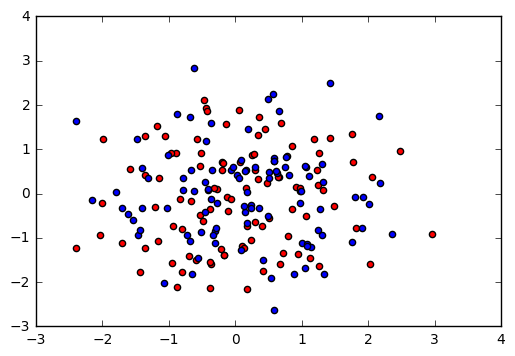

In [20]:
## Describe the bottom 9 panels in the document "k-Nearest Neighbor Method" on the change in the regions along the parameter values of k.
#Refference is http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_k-NN_k-nearest-neighbors-algorithm.php
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#Generate Sample data
import numpy as np
K = 200
p = 2
x = np.random.randn(K,2) 
ctr1 = 1
ctr2 = 0.5
r1 = 0.2
r2 = 0.5
v = r1 * (x[:,0]-ctr1)**2 + r2 * (x[:,1]-ctr2)**2
t = 1.2
v0 = np.where(v< t)[0]
v1 = np.where(v>=t)[0]

gr = np.zeros(K)
p0 = 0.1
p1 = 0.9
for i in range(len(v0)):
    idx = v0[i]
    gr[idx] = np.random.choice([0,1],1, [p0,1-p0])

for i in range(len(v1)):
    idx = v1[i]
    gr[idx] = np.random.choice([0,1],1, [p1,1-p1])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x1 = x[gr==0,0]
y1 = x[gr==0,1]
x2 = x[gr==1,0]
y2 = x[gr==1,1]
ax.scatter(x1,y1, c='red')
ax.scatter(x2,y2, c='blue')
plt.show()

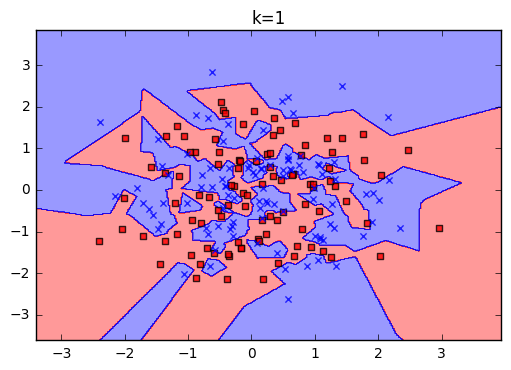

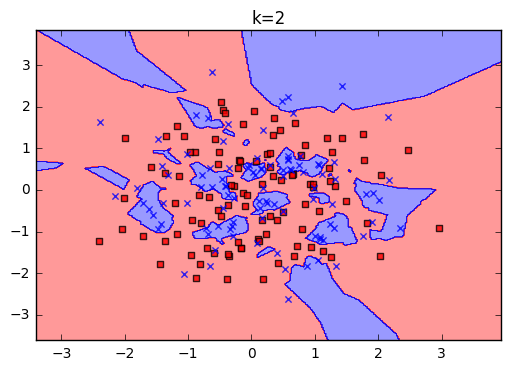

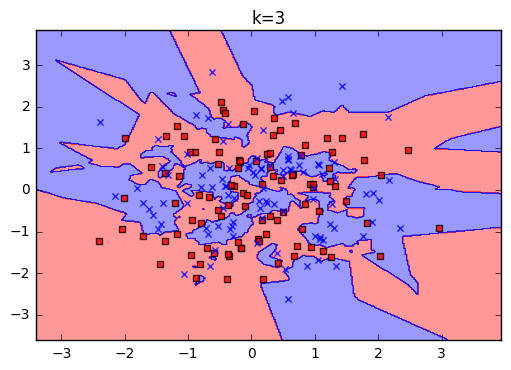

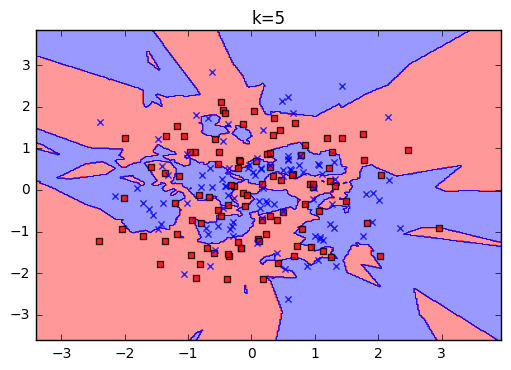

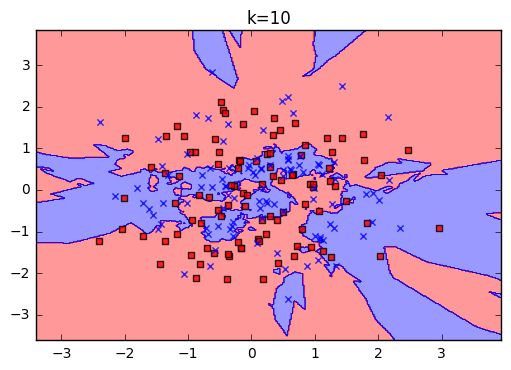

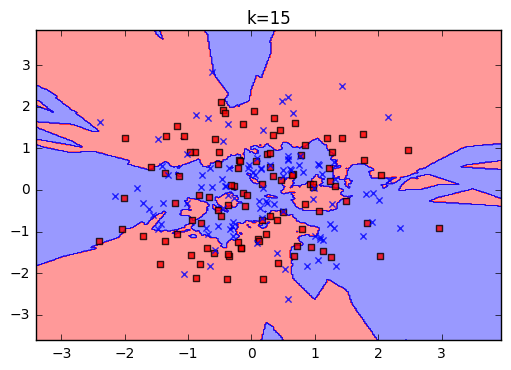

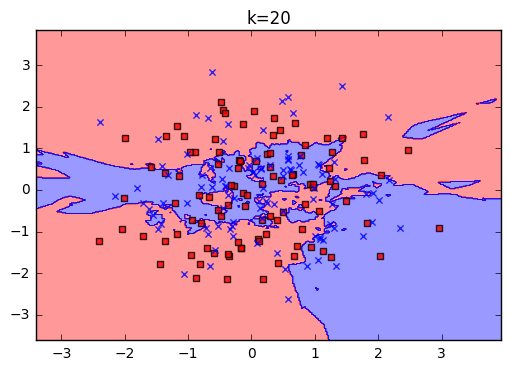

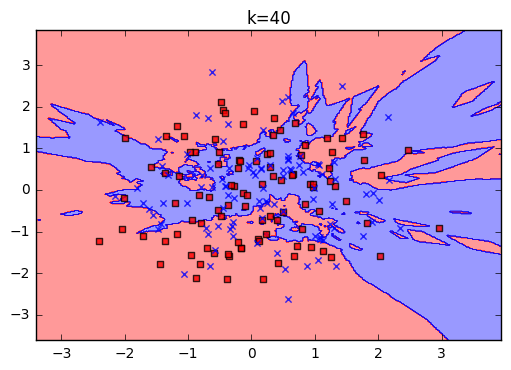

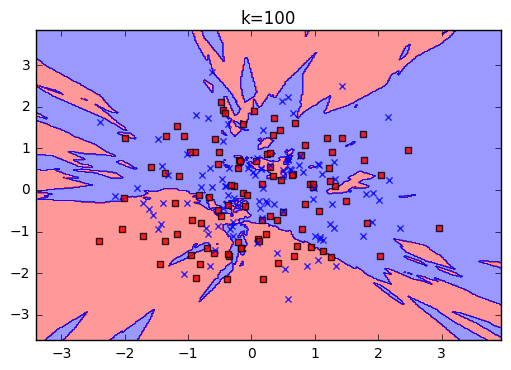

In [26]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

from sklearn.neighbors import NearestNeighbors
ks = [1,2,3,5,10,15,20,40,100]
for i in range(len(ks)):
    knn = KNeighborsClassifier(n_neighbors=ks[i], p=2,metric='minkowski')
    knn.fit(x,gr)
    plot_decision_regions(x, gr,classifier=knn)
    plt.title("k="+str(ks[i]))
    plt.show()